In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("model/")
from unet2 import Unet
from diffusion import GaussianDiffusion, DiffusionImageAPI
import torch
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt


In [ ]:
from PIL import Image
import requests
import torch 

"""url = "https://www.themoviedb.org/t/p/w1280/6oom5QYQ2yQTMJIbnvbkBL9cHo6.jpg"
image = Image.open(requests.get(url, stream=True).raw)
w, h = image.size
#image = image.resize((w // 16, h // 16))
image = image.resize((128, 192))
w, h = image.size
print(f"[{w}x{h}]")
image
#image.save("./test.jpg")"""
import matplotlib.pyplot as plt

x=torch.randn(192,128,3)
plt.imshow(x)
#image = Image.fromarray(((x.numpy()+1)*255/2).astype(int))
#((x.numpy()+1)*255/2).astype(int)


In [234]:
import numpy as np
x0 = torch.tensor(np.array(Image.open("bovik_star_wars.png").convert('RGB'))).type(torch.float32)
#x0 = torch.zeros_like(x0)
x0 = diffusion.normalize_image(x0)
x0 = x0.permute(2, 0, 1)
x0 = x0.unsqueeze(0)


images, versions = diffusion.sample(1,x0=x0)

timesteps = np.linspace(0, 999, 10).astype(int)
#print(timesteps)




899it [01:12, 12.56it/s]

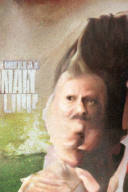

In [233]:
images = [imageAPI.tensor_to_image(image.squeeze(0).permute(1,2,0)) for image in images]
images[0]


In [231]:
images = []
for image in versions:
  images.append(imageAPI.tensor_to_image(image.squeeze(0).permute(1, 2, 0)))

print(len(images))
print(images[0])
# make gif out of pillow images
images[0].save('./gif_output/versions_bovik.gif',
                save_all=True,
                append_images=images[1:],
                duration=100,
                loop=0)


999
<PIL.Image.Image image mode=RGB size=128x192 at 0x24E69C51BA0>


In [165]:
IMAGE_HEIGHT = 192
IMAGE_WIDTH = 128
images, _ = diffusion.sample(4, show_progress=False)
images = [imageAPI.tensor_to_image(image.squeeze(0).permute(1,2,0)) for image in images]
# convert images to single image with 4x4 grid with some padding
collage = Image.new('RGB', (IMAGE_WIDTH*2+16, IMAGE_HEIGHT*2+16), (255, 255, 255))
#collage = Image.new('RGB', (IMAGE_WIDTH*2+16, IMAGE_HEIGHT), (0, 0, 0))
for i in range(2):
  #j = 0
  for j in range(2):
    collage.paste(images[i*2+j], (i*IMAGE_WIDTH+8, j*IMAGE_HEIGHT+8))
  #collage.paste(images[i], (i*IMAGE_WIDTH+8, j*IMAGE_HEIGHT+8))


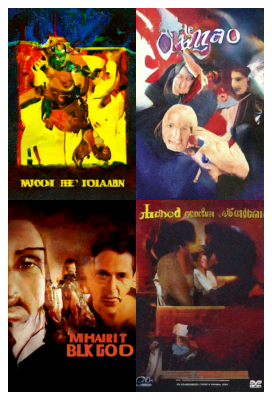

In [166]:
collage


In [ ]:
"""print(len(images))
for i in range(len(images)):
  plt.subplot(4, 5, i + 1)
  plt.imshow(images[i])
  plt.axis("off")
"""
print(type(images[0]))
new = [imageAPI.tensor_to_image(image.squeeze(0).permute(1,2,0)) for image in images]
plt.imshow(new[0])


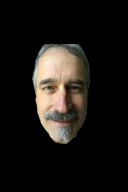

In [144]:
import numpy as np
x0 = Image.open("bovik_face_blackbg.png").convert('RGB')
x0 = torch.tensor(np.array(x0).astype(float))
x0 = diffusion.normalize_image(x0)
imageAPI.tensor_to_image(diffusion.denormalize_image(x0))


In [145]:
x0 = x0.permute(2, 0, 1)
x0.shape


torch.Size([3, 192, 128])

In [146]:
x0 = x0.unsqueeze(0)
x = torch.randn(1, 3, 192, 128, dtype=torch.float64)
mask = x0 != -1

new_x = x
new_x[mask] = x0[mask]

x = new_x


In [147]:
x = x.permute(0, 2, 3, 1)


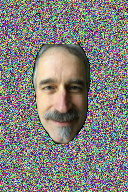

In [148]:
imageAPI.tensor_to_image(diffusion.denormalize_image(x.squeeze(0)))


In [152]:

model = Unet(
    image_channels=3,
  ).to('cuda')
model.load_state_dict(torch.load("./out/model_260h.pt"))

diffusion = GaussianDiffusion(
    model=model,
    #noise_steps=256,
    noise_steps=1000,
    beta_0=1e-4,
    beta_T=0.02,
    image_size=(192, 128),
    #image_size=(16, 16),
  ).to('cuda')

imageAPI = DiffusionImageAPI(diffusion)



In [ ]:
NOISE_STEPS = 4000
MODEL = None
BETA_0 = 1e-4
BETA_T = 0.2
IMAGE_SIZE = (w,h)


diffusion_cos = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="cosine"
)
diffusion_lin = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="linear"
)

diffusion_sig = GaussianDiffusion(
  model=MODEL,
  noise_steps=NOISE_STEPS,
  beta_0=BETA_0,
  beta_T=BETA_T,
  image_size=IMAGE_SIZE,
  schedule="sigmoid"
)


In [ ]:
#print(diffusion_lin.betas)
a = diffusion_sig.betas
b = diffusion_cos.betas
c = diffusion_lin.betas
#print(a)
#print(b[100])


plt.plot(range(NOISE_STEPS),a)
plt.plot(range(NOISE_STEPS),b)
plt.plot(range(NOISE_STEPS),c)

plt.legend(["Sigmoid","Cosine","Linear"])
plt.show()


In [ ]:
imageAPI = DiffusionImageAPI(diffusion_cos)
timesteps = np.linspace(0, 3999, 20).astype(int)
#print(timesteps)

images = imageAPI.get_noisy_images(image, time_steps=timesteps)
print(len(images))
for i in range(len(images)):
  plt.subplot(4, 5, i + 1)
  plt.imshow(images[i])
  plt.axis("off")


In [ ]:
len(torch.Size([2, 1, 120, 80, 3]))


In [ ]:
image = image_copy
image = torch.from_numpy(np.array(image))
image = diffusion.normalize_image(image)
t = diffusion.sample_time_steps(1)
print(t)
image = diffusion.apply_noise(image, t)
imageAPI.tensor_to_image(diffusion.denormalize_image(image.squeeze(0)))
